# Surface vertex classification

In this notebook we demonstrate how to retrieve surface/vertex measurements to classify vertices on the surface. The used example data is a derived from of [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081#.Y94N4XbMJmN) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode). See the [creating_surfaces](creating_surfaces.ipynb) for how to create the surface from raw imaging data.

See also
* [vedo library](https://vedo.embl.es/)
* [vedo add curvature documentation](https://vedo.embl.es/autodocs/content/vedo/mesh.html?highlight=curvature#vedo.mesh.Mesh.addCurvatureScalars)

You need to additionally install the [napari-accelerated-pixel-and-object-classification plugin](https://www.napari-hub.org/plugins/napari-accelerated-pixel-and-object-classification), e.g. by calling `mamba install napari-accelerated-pixel-and-object-classification -c conda-forge` from the terminal.

In [1]:
import napari_process_points_and_surfaces as nppas

import napari
import apoc
import numpy as np

We will be working with a simple geometry (i.e., an ellipsoid) to demonstrate the curvature property and the different settings.

The nppas gastruloid example is derived from AV Luque and JV Veenvliet (2023) which is licensed CC-BY (https://creativecommons.org/licenses/by/4.0/legalcode) and can be downloaded from here: https://zenodo.org/record/7603081


(array([[ 14.174363, 220.40599 , 224.08286 ],
        [ 13.983076, 208.15877 , 220.32153 ],
        [ 14.819012, 219.06023 , 229.4558  ],
        ...,
        [112.18208 , 356.98364 , 430.36832 ],
        [112.3784  , 360.45856 , 421.8425  ],
        [112.865425, 352.2561  , 422.1735  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64))
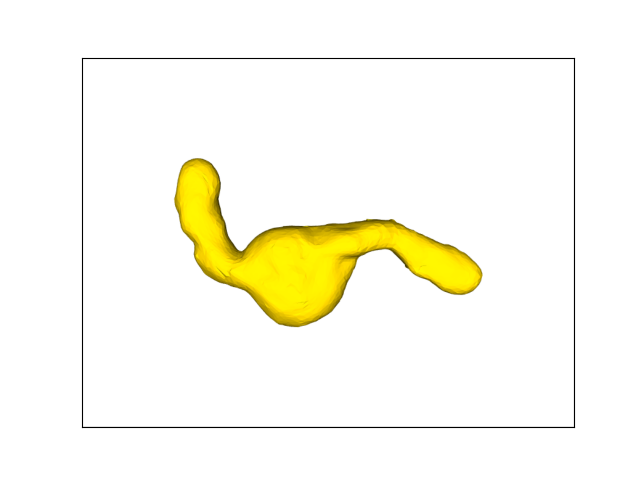

In [2]:
surface = nppas.gastruloid()
surface

## Quantification
We can create a table ([pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)) like this.

In [3]:
requested_measurements = [nppas.Quality.AREA, 
                          nppas.Quality.ASPECT_RATIO,
                          nppas.Quality.GAUSS_CURVATURE, 
                          nppas.Quality.MEAN_CURVATURE,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL,
                         ]

df = nppas.surface_quality_table(surface, requested_measurements)
df

c:\structure\code\vedo\vedo\pointcloud.py:526: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C, residue, rank, _ = np.linalg.lstsq(A, f)  # solve AC=f


,vertex_index,Quality.AREA,Quality.ASPECT_RATIO,Quality.GAUSS_CURVATURE,Quality.MEAN_CURVATURE,Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL,Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL
0,0,29.997389,1.600400,0.030287,0.000490,0.000257,0.000019
1,1,46.087046,1.602183,0.011136,0.000018,0.000250,0.000019
2,2,35.886338,1.400599,0.012633,0.000142,0.000253,0.000019
3,3,22.887296,1.751932,0.036979,0.000548,0.000379,0.000019
4,4,29.952347,1.220882,0.010277,0.000047,0.000391,0.000019
...,...,...,...,...,...,...,...
3319,3319,25.079661,1.340802,0.031878,0.000606,0.000168,0.000019
3320,3320,47.213916,1.254924,0.004615,0.000003,0.000169,0.000019
3321,3321,35.964707,1.140267,0.015661,0.000198,0.000163,0.000019
3322,3322,45.673529,1.189562,0.011380,0.000100,0.000152,0.000019


To get an overview about measurements, we can summarize them:

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vertex_index,3324.0,1661.500000,9.597005e+02,0.000000,830.750000,1661.500000,2492.250000,3323.000000
Quality.AREA,3324.0,33.753233,1.079078e+01,5.677486,26.694735,32.956835,39.255080,125.564101
Quality.ASPECT_RATIO,3324.0,7.126810,8.990960e+01,1.038034,1.292444,1.437911,1.648299,3421.965459
Quality.GAUSS_CURVATURE,3324.0,0.016958,3.527488e-02,-1.031106,0.005509,0.013645,0.024739,0.348243
Quality.MEAN_CURVATURE,3324.0,0.000383,7.652709e-03,-0.028035,-0.000135,0.000010,0.000270,0.426018
Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL,3324.0,0.000258,6.857515e-05,0.000152,0.000214,0.000241,0.000275,0.000545
Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL,3324.0,0.000019,3.388642e-21,0.000019,0.000019,0.000019,0.000019,0.000019


From that table, we can extract a single column as list.

In [5]:
sp_curvature = list(df['Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL'])
sp_curvature[:5]

[0.0002572409483117654,
 0.00025042866718866794,
 0.0002531992227477513,
 0.00037887302875519685,
 0.00039058363169657424]

## Visualizing measurements
To visualize the measurements, we need to attach them to the surface:

In [6]:
quantified_surface = nppas.set_vertex_values(surface, sp_curvature)

The visualization can be customized as well, e.g. by changing the view angle and the colormap.

(array([[ 14.174363, 220.40599 , 224.08286 ],
        [ 13.983076, 208.15877 , 220.32153 ],
        [ 14.819012, 219.06023 , 229.4558  ],
        ...,
        [112.18208 , 356.98364 , 430.36832 ],
        [112.3784  , 360.45856 , 421.8425  ],
        [112.865425, 352.2561  , 422.1735  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64),
 [0.0002572409483117654,
  0.00025042866718866794,
  0.0002531992227477513,
  0.00037887302875519685,
  0.00039058363169657424,
  0.0003600190783964104,
  0.0003812024248736095,
  0.0004032214052519288,
  0.0002661565851518192,
  0.0002720534146162575,
  0.0002614593000182443,
  0.0002535430671034702,
  0.0002444765153185341,
  0.000257360827669421,
  0.00025511530875216005,
  0.00042729231737963306,
  0.00040987383076612847,
  0.0004150967696368238,
  0.0003926723959885801,
  0.0003564980315785759,
  0.0003623340825496488,
  0.00033555981114871653,
  0.00033173650865084286,
  0.0002921858941142099,
  0.0002892736949807465,
  0.0002721312389510652,
  0.0002739698612751383,
  0.00025648821536703267,
  0.0002612249776248378,
  0.0002478275507613372,
  0.00026498619789606747,
  0.00026065427051607403,
  0.0002524483195951812,
  0.00019891821191909436,
  0.00020176568265474089,
  0.00020818335784812488,
  0.0001850191151668224,
  0.0002076759196735631,
  0.0001690413263473044,
  0.00016712950748005062,
  0.0001684276906393751,
  0.00017519826069848274,
  0.00017313698174847573,
  0.00016952165218300845,
  0.00017064989767587353,
  0.00018770826806459447,
  0.0001852143259732519,
  0.0001923523927073288,
  0.00019944376481798653,
  0.00019322147485570867,
  0.0004272880169744272,
  0.00036595567871689725,
  0.0003132085794564319,
  0.00034012046388165316,
  0.00030500059081084826,
  0.00031644591183555357,
  0.0003164924482079102,
  0.0002717489166254353,
  0.0002966246372772681,
  0.0002696932664949742,
  0.0002444676981293004,
  0.00026216161449327605,
  0.00026243819275078927,
  0.00025959623242481785,
  0.0002536757731849083,
  0.00021426161322416978,
  0.00021748430529425168,
  0.0002040980568482802,
  0.00021400355001653394,
  0.00019214256535299328,
  0.00020509264508201098,
  0.00018253943460016533,
  0.00017454588186636665,
  0.0001713500138058328,
  0.00017694103381585434,
  0.00017555980167772148,
  0.00017827197531162153,
  0.00017038514614467286,
  0.00016902581961629817,
  0.00017623218514931563,
  0.0001768753462650038,
  0.00017058922428553688,
  0.00017349616645110643,
  0.00017501709326249017,
  0.0001711842426333082,
  0.0001693081006526344,
  0.0001707192686465572,
  0.00017425499642092498,
  0.00017100157018340253,
  0.00017163491312213996,
  0.00017902069002878008,
  0.00019059227938701603,
  0.0001923885437297693,
  0.00018288453427589888,
  0.00018364720765073748,
  0.0001868497096903202,
  0.0001896479190321488,
  0.00020123964674876847,
  0.00019707817843142572,
  0.00020782125792412858,
  0.00021144493925669554,
  0.00020766153444654346,
  0.00043871884645211147,
  0.0004009767688542877,
  0.00040662381715911566,
  0.0004314457126305084,
  0.0003590238656272754,
  0.0003306031915479628,
  0.0003245627731504485,
  0.0003002202891710231,
  0.00029067551937629604,
  0.00032003665234913705,
  0.000262084120447589,
  0.0002616737912426526,
  0.00026765465224470907,
  0.0002642306988428909,
  0.0002521125145869295,
  0.0002562409438027258,
  0.00026524212313002913,
  0.00025775642493665383,
  0.0002527826022894682,
  0.0002511083640454574,
  0.00025872755582161615,
  0.0002525425677182156,
  0.0002202958097073085,
  0.00022296004718168385,
  0.00022531950092256778,
  0.0001959227614219583,
  0.00018939125953744125,
  0.00019768087544193047,
  0.00019178026167455538,
  0.00018047806258040714,
  0.00019168217876493543,
  0.0001854649539868315,
  0.00017275093398090628,
  0.0001739426121088212,
  0.0001721593673798292,
  
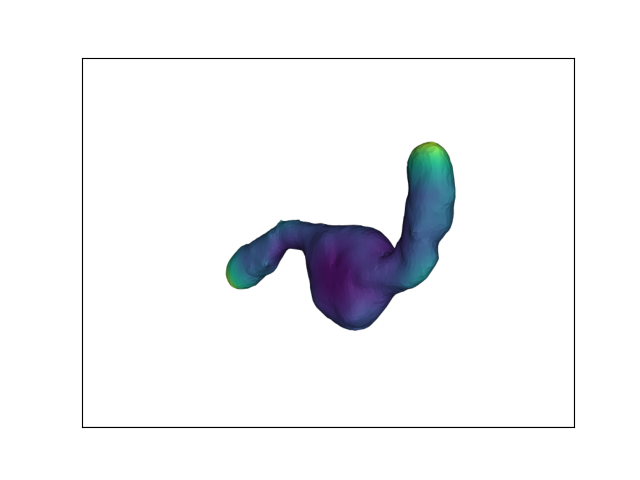
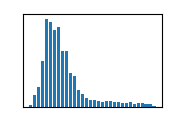

In [7]:
quantified_surface.azimuth = -135
quantified_surface

(array([[ 14.174363, 220.40599 , 224.08286 ],
        [ 13.983076, 208.15877 , 220.32153 ],
        [ 14.819012, 219.06023 , 229.4558  ],
        ...,
        [112.18208 , 356.98364 , 430.36832 ],
        [112.3784  , 360.45856 , 421.8425  ],
        [112.865425, 352.2561  , 422.1735  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64),
 [0.0002572409483117654,
  0.00025042866718866794,
  0.0002531992227477513,
  0.00037887302875519685,
  0.00039058363169657424,
  0.0003600190783964104,
  0.0003812024248736095,
  0.0004032214052519288,
  0.0002661565851518192,
  0.0002720534146162575,
  0.0002614593000182443,
  0.0002535430671034702,
  0.0002444765153185341,
  0.000257360827669421,
  0.00025511530875216005,
  0.00042729231737963306,
  0.00040987383076612847,
  0.0004150967696368238,
  0.0003926723959885801,
  0.0003564980315785759,
  0.0003623340825496488,
  0.00033555981114871653,
  0.00033173650865084286,
  0.0002921858941142099,
  0.0002892736949807465,
  0.0002721312389510652,
  0.0002739698612751383,
  0.00025648821536703267,
  0.0002612249776248378,
  0.0002478275507613372,
  0.00026498619789606747,
  0.00026065427051607403,
  0.0002524483195951812,
  0.00019891821191909436,
  0.00020176568265474089,
  0.00020818335784812488,
  0.0001850191151668224,
  0.0002076759196735631,
  0.0001690413263473044,
  0.00016712950748005062,
  0.0001684276906393751,
  0.00017519826069848274,
  0.00017313698174847573,
  0.00016952165218300845,
  0.00017064989767587353,
  0.00018770826806459447,
  0.0001852143259732519,
  0.0001923523927073288,
  0.00019944376481798653,
  0.00019322147485570867,
  0.0004272880169744272,
  0.00036595567871689725,
  0.0003132085794564319,
  0.00034012046388165316,
  0.00030500059081084826,
  0.00031644591183555357,
  0.0003164924482079102,
  0.0002717489166254353,
  0.0002966246372772681,
  0.0002696932664949742,
  0.0002444676981293004,
  0.00026216161449327605,
  0.00026243819275078927,
  0.00025959623242481785,
  0.0002536757731849083,
  0.00021426161322416978,
  0.00021748430529425168,
  0.0002040980568482802,
  0.00021400355001653394,
  0.00019214256535299328,
  0.00020509264508201098,
  0.00018253943460016533,
  0.00017454588186636665,
  0.0001713500138058328,
  0.00017694103381585434,
  0.00017555980167772148,
  0.00017827197531162153,
  0.00017038514614467286,
  0.00016902581961629817,
  0.00017623218514931563,
  0.0001768753462650038,
  0.00017058922428553688,
  0.00017349616645110643,
  0.00017501709326249017,
  0.0001711842426333082,
  0.0001693081006526344,
  0.0001707192686465572,
  0.00017425499642092498,
  0.00017100157018340253,
  0.00017163491312213996,
  0.00017902069002878008,
  0.00019059227938701603,
  0.0001923885437297693,
  0.00018288453427589888,
  0.00018364720765073748,
  0.0001868497096903202,
  0.0001896479190321488,
  0.00020123964674876847,
  0.00019707817843142572,
  0.00020782125792412858,
  0.00021144493925669554,
  0.00020766153444654346,
  0.00043871884645211147,
  0.0004009767688542877,
  0.00040662381715911566,
  0.0004314457126305084,
  0.0003590238656272754,
  0.0003306031915479628,
  0.0003245627731504485,
  0.0003002202891710231,
  0.00029067551937629604,
  0.00032003665234913705,
  0.000262084120447589,
  0.0002616737912426526,
  0.00026765465224470907,
  0.0002642306988428909,
  0.0002521125145869295,
  0.0002562409438027258,
  0.00026524212313002913,
  0.00025775642493665383,
  0.0002527826022894682,
  0.0002511083640454574,
  0.00025872755582161615,
  0.0002525425677182156,
  0.0002202958097073085,
  0.00022296004718168385,
  0.00022531950092256778,
  0.0001959227614219583,
  0.00018939125953744125,
  0.00019768087544193047,
  0.00019178026167455538,
  0.00018047806258040714,
  0.00019168217876493543,
  0.0001854649539868315,
  0.00017275093398090628,
  0.0001739426121088212,
  0.0001721593673798292,
  
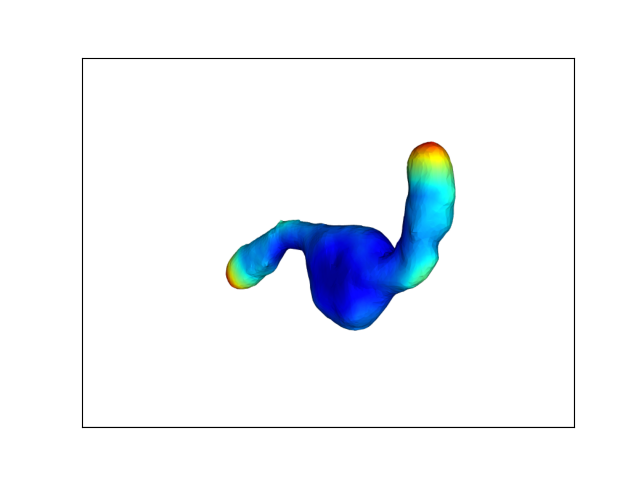
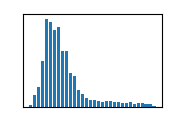

In [8]:
quantified_surface.cmap = 'jet'
quantified_surface

## Interacting with surface data in Napari
We now open Napari to interact with the data

In [9]:
viewer = napari.Viewer(ndisplay=3)
viewer.camera.angles = (40, -30, 55)

In [10]:
surface_layer = viewer.add_surface(surface, colormap='hsv')

In [11]:
surface_layer.properties = df.to_dict(orient='list')
surface_layer.features = df

In [12]:
from napari_skimage_regionprops import add_table
add_table(surface_layer, viewer)

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


In [13]:
viewer.window.add_dock_widget(nppas.SurfaceAnnotationWidget(viewer))

# Manual annotation
Use the napari window and the Surface Annotation Widget to draw with value 2 and 3 in concave and convex region on the surface.

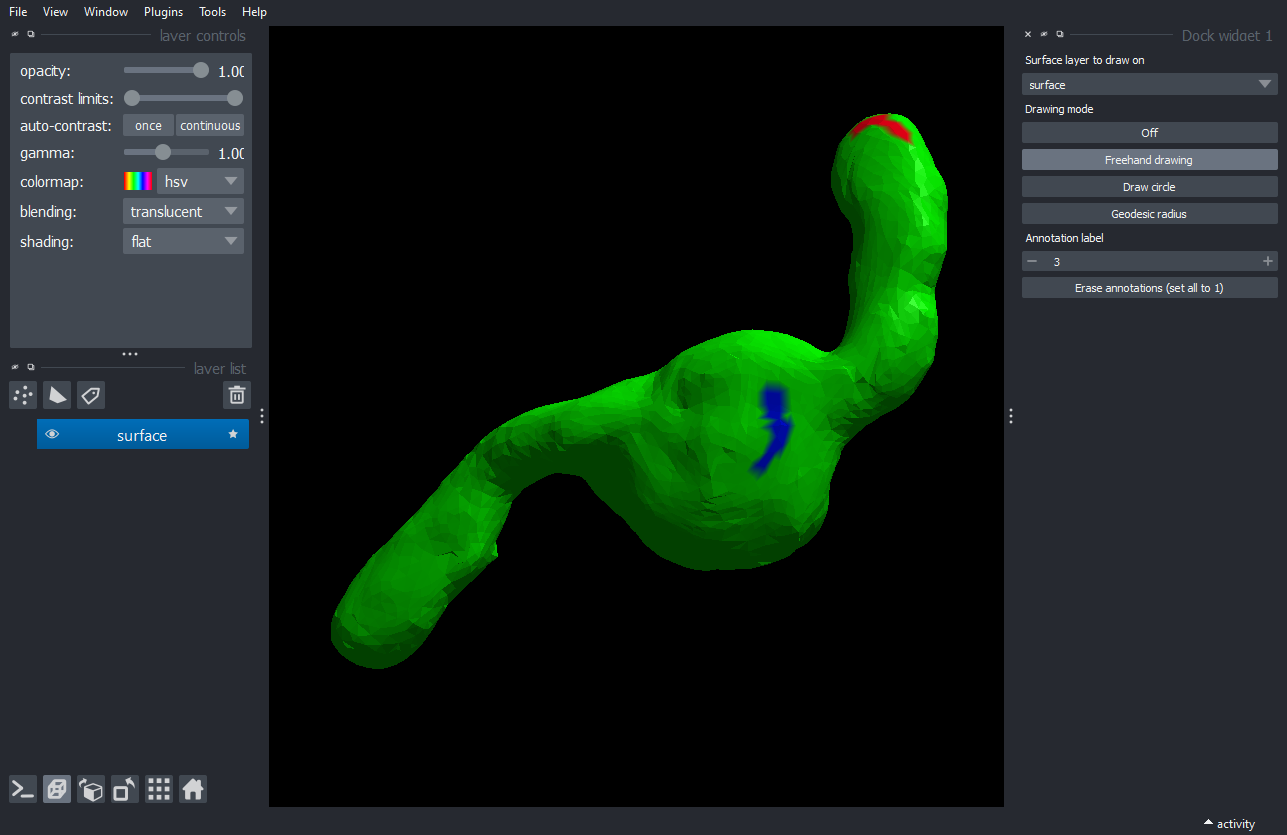

In [14]:
napari.utils.nbscreenshot(viewer)

In [15]:
from napari_accelerated_pixel_and_object_classification._surface_vertex_classifier import SurfaceVertexClassifierWidget
viewer.window.add_dock_widget(SurfaceVertexClassifierWidget(viewer))

Selected surface layer: surface
Selected measurements: ['Quality.AREA', 'Quality.ASPECT_RATIO', 'Quality.GAUSS_CURVATURE', 'Quality.MEAN_CURVATURE', 'Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL', 'Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL']
selected properties       Quality.AREA  Quality.ASPECT_RATIO  Quality.GAUSS_CURVATURE  \
0        29.997389              1.600400                 0.030287   
1        46.087046              1.602183                 0.011136   
2        35.886338              1.400599                 0.012633   
3        22.887296              1.751932                 0.036979   
4        29.952347              1.220882                 0.010277   
...            ...                   ...                      ...   
3319     25.079661              1.340802                 0.031878   
3320     47.213916              1.254924                 0.004615   
3321     35.964707              1.140267                 0.015661   
3322     45.673529              1.189562        

# Train classifier
Next, we can use the Surface Vertex Classification widget to train a classifier.

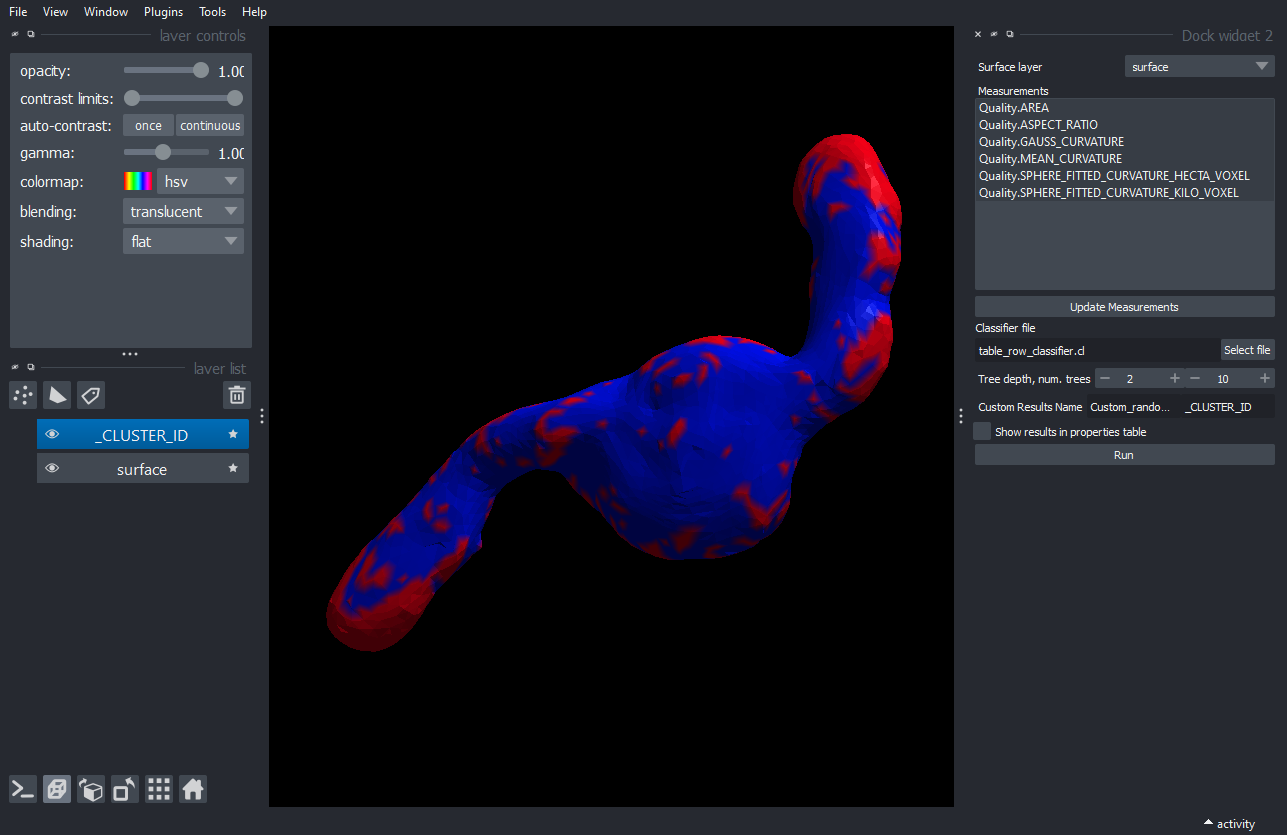

In [16]:
napari.utils.nbscreenshot(viewer)

## Apply classifier

The classifier is an [apoc](https://github.com/haesleinhuepf/apoc) TableRowClassifier, which can be applied to the table/DataFrame above.

In [17]:
table_row_classifier = apoc.TableRowClassifier(opencl_filename='table_row_classifier.cl')

In [18]:
result = table_row_classifier.predict(df)

In [19]:
result

array([1, 1, 2, ..., 2, 1, 2], dtype=uint32)

In [20]:
df['classification'] = result
df

,vertex_index,Quality.AREA,Quality.ASPECT_RATIO,Quality.GAUSS_CURVATURE,Quality.MEAN_CURVATURE,Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL,Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL,_CLUSTER_ID,classification
0,0,29.997389,1.600400,0.030287,0.000490,0.000257,0.000019,2.0,1
1,1,46.087046,1.602183,0.011136,0.000018,0.000250,0.000019,2.0,1
2,2,35.886338,1.400599,0.012633,0.000142,0.000253,0.000019,3.0,2
3,3,22.887296,1.751932,0.036979,0.000548,0.000379,0.000019,3.0,2
4,4,29.952347,1.220882,0.010277,0.000047,0.000391,0.000019,3.0,2
...,...,...,...,...,...,...,...,...,...
3319,3319,25.079661,1.340802,0.031878,0.000606,0.000168,0.000019,3.0,2
3320,3320,47.213916,1.254924,0.004615,0.000003,0.000169,0.000019,2.0,1
3321,3321,35.964707,1.140267,0.015661,0.000198,0.000163,0.000019,3.0,2
3322,3322,45.673529,1.189562,0.011380,0.000100,0.000152,0.000019,2.0,1


(array([[ 14.174363, 220.40599 , 224.08286 ],
        [ 13.983076, 208.15877 , 220.32153 ],
        [ 14.819012, 219.06023 , 229.4558  ],
        ...,
        [112.18208 , 356.98364 , 430.36832 ],
        [112.3784  , 360.45856 , 421.8425  ],
        [112.865425, 352.2561  , 422.1735  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64),
 array([1, 1, 2, ..., 2, 1, 2], dtype=uint32))
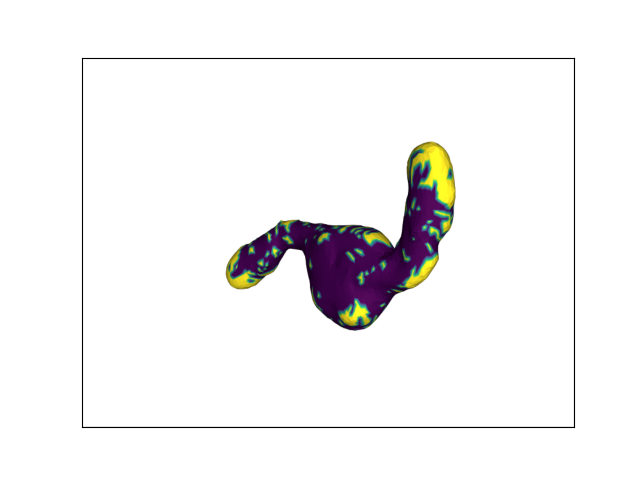
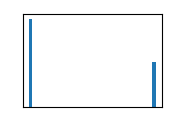

In [22]:
annotated_surface = nppas.set_vertex_values(surface, result)
annotated_surface.azimuth = -135
annotated_surface